In [1]:
import pandas as pd
import numpy as np


In [2]:
df= pd.read_csv('/kaggle/input/global-air-pollution-data/global_air_pollution_data.csv')

In [3]:
df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [4]:
df.columns

Index(['country_name', 'city_name', 'aqi_value', 'aqi_category',
       'co_aqi_value\t', 'co_aqi_category', 'ozone_aqi_value',
       'ozone_aqi_category', 'no2_aqi_value', 'no2_aqi_category',
       'pm2.5_aqi_value', 'pm2.5_aqi_category'],
      dtype='object')

In [5]:
df = df.rename(columns={'co_aqi_value\t': 'co_aqi_value'})


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value        23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [7]:
df.describe()

,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


In [8]:
df.isnull().sum()

country_name          427
city_name               1
aqi_value               0
aqi_category            0
co_aqi_value            0
co_aqi_category         0
ozone_aqi_value         0
ozone_aqi_category      0
no2_aqi_value           0
no2_aqi_category        0
pm2.5_aqi_value         0
pm2.5_aqi_category      0
dtype: int64

In [9]:
df.dropna()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
23458,India,Gursahaiganj,184,Unhealthy,3,Good,154,Unhealthy,2,Good,184,Unhealthy
23459,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good
23460,India,Mormugao,50,Good,1,Good,22,Good,1,Good,50,Good
23461,United States of America,Westerville,71,Moderate,1,Good,44,Good,2,Good,71,Moderate


In [10]:
import warnings
warnings.filterwarnings('ignore')


In [11]:

custom_order = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy','Hazardous']
df['aqi_category'] = pd.Categorical(df['aqi_category'], categories=custom_order, ordered=True)

details_of_air= df.pivot_table(index='country_name', columns='aqi_category', values='aqi_value', aggfunc='mean')

details_of_air

aqi_category,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous
country_name,,,,,,
Afghanistan,49.000000,76.366667,118.153846,165.200000,NaN,NaN
Albania,44.000000,66.714286,114.000000,NaN,NaN,NaN
Algeria,39.000000,78.333333,116.333333,159.000000,NaN,NaN
Andorra,29.333333,NaN,NaN,NaN,NaN,NaN
Angola,33.100000,66.222222,122.000000,172.000000,285.0,NaN
...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),40.434783,65.465116,123.133333,155.888889,NaN,NaN
Viet Nam,38.454545,68.727273,114.500000,164.500000,NaN,NaN
Yemen,NaN,81.000000,146.500000,159.500000,NaN,NaN


In [12]:
details_of_air.describe()

aqi_category,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous
count,139.000000,153.000000,95.000000,68.000000,20.000000,11.000000
mean,36.211342,67.842341,117.654743,162.911711,228.863660,403.552890
std,6.714972,8.353389,9.140154,8.842302,19.417934,65.924348
min,16.000000,52.000000,100.000000,150.000000,209.000000,300.000000
25%,33.000000,62.161616,111.794643,156.156250,214.000000,348.833333
50%,37.000000,67.027397,118.000000,161.500000,223.500000,415.000000
75%,41.000000,72.500000,121.958333,168.055556,234.137500,435.810127
max,49.000000,96.000000,148.000000,195.000000,285.000000,500.000000


In [13]:
details_of_air.style.background_gradient(cmap='coolwarm')

aqi_category,Good,Moderate,Unhealthy for Sensitive Groups,Unhealthy,Very Unhealthy,Hazardous
country_name,,,,,,
Afghanistan,49.000000,76.366667,118.153846,165.200000,nan,nan
Albania,44.000000,66.714286,114.000000,nan,nan,nan
Algeria,39.000000,78.333333,116.333333,159.000000,nan,nan
Andorra,29.333333,nan,nan,nan,nan,nan
Angola,33.100000,66.222222,122.000000,172.000000,285.000000,nan
Argentina,22.596774,70.166667,141.000000,nan,nan,nan
Armenia,35.100000,66.272727,100.000000,nan,nan,nan
Aruba,nan,nan,nan,163.000000,nan,nan
Australia,27.333333,58.000000,114.000000,nan,264.000000,nan


In [14]:
print(details_of_air['Hazardous'].dropna())

country_name
Chile                               358.000000
China                               332.333333
Democratic Republic of the Congo    415.000000
India                               450.620253
Mexico                              339.666667
Pakistan                            419.461538
Republic of Korea                   421.000000
Russian Federation                  500.000000
South Africa                        403.000000
United States of America            500.000000
Uzbekistan                          300.000000
Name: Hazardous, dtype: float64


In [15]:
print(details_of_air['Very Unhealthy'].dropna())

country_name
Angola                              285.000000
Australia                           264.000000
Bangladesh                          214.000000
Brazil                              239.333333
Chile                               235.750000
China                               210.044444
Democratic Republic of the Congo    249.500000
India                               232.916031
Indonesia                           223.000000
Iran (Islamic Republic of)          220.250000
Malaysia                            209.000000
Mauritania                          224.000000
Mexico                              233.421053
Namibia                             218.000000
Nepal                               222.333333
Nigeria                             210.666667
Pakistan                            227.458333
Russian Federation                  214.000000
Senegal                             211.000000
South Africa                        233.600000
Name: Very Unhealthy, dtype: float64


# Air Quality Analysis For Indian Subcontinent

In [16]:
country = df[df['country_name']=='India']

country.describe()

,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,152.964228,1.743569,55.061495,1.965032,149.463023
std,94.317888,1.522172,42.750817,3.773330,86.254345
min,21.000000,0.000000,1.000000,0.000000,13.000000
25%,89.000000,1.000000,27.750000,0.000000,88.000000
50%,153.000000,1.000000,38.000000,1.000000,153.000000
75%,172.000000,3.000000,65.000000,2.000000,171.000000
max,500.000000,12.000000,205.000000,43.000000,500.000000


In [17]:
country = country.sort_values(by=['aqi_value'], ascending=False)
country['aqi_value'].mean()

152.96422829581994

In [18]:
columns =['aqi_value','co_aqi_value','ozone_aqi_value','no2_aqi_value', 'pm2.5_aqi_value']
for column in country[columns]:
    print(column, "Mean:",country[column].mean())
    print(column, "Max:", country[column].max(), ", the city :",
          country[country[column] == country[column].max()]
          ['city_name'].values[0])
    print(column, "Min:", country[column].min() , ", the city :",
          country[country[column] == country[column].min()]
          ['city_name'].values[0])
    print()

aqi_value Mean: 152.96422829581994
aqi_value Max: 500 , the city : Sisauli
aqi_value Min: 21 , the city : Birur

co_aqi_value Mean: 1.7435691318327975
co_aqi_value Max: 12 , the city : Rishra
co_aqi_value Min: 0 , the city : Ratangarh

ozone_aqi_value Mean: 55.06149517684887
ozone_aqi_value Max: 205 , the city : Kheri
ozone_aqi_value Min: 1 , the city : Rishra

no2_aqi_value Mean: 1.965032154340836
no2_aqi_value Max: 43 , the city : Soron
no2_aqi_value Min: 0 , the city : Bikaner

pm2.5_aqi_value Mean: 149.4630225080386
pm2.5_aqi_value Max: 500 , the city : Sisauli
pm2.5_aqi_value Min: 13 , the city : Aizawl



# Correletation Analysis

In [19]:
columns =['aqi_value','co_aqi_value','ozone_aqi_value','no2_aqi_value', 'pm2.5_aqi_value']
country = df[df['country_name']=='India']
data_to_be_visualised = country[columns]
data_to_be_visualised

,aqi_value,co_aqi_value,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
12,158,3,139,1,158
16,154,3,100,2,154
19,161,2,71,0,161
21,118,2,30,2,118
25,81,1,24,1,81
...,...,...,...,...,...
23401,185,2,85,2,185
23409,156,2,36,2,156
23454,86,0,23,0,86
23458,184,3,154,2,184


In [20]:

columns =['aqi_value','co_aqi_value','ozone_aqi_value','no2_aqi_value', 'pm2.5_aqi_value']
world_data_visualization = df[columns]

In [21]:
d_corr = world_data_visualization.corr()['aqi_value'][1:5]
top_features=d_corr[abs(d_corr)>0.4].sort_values(ascending=False)
print('These are the most correlated values with the Air Quality Index:')
print(top_features)

These are the most correlated values with the Air Quality Index:
pm2.5_aqi_value    0.984327
co_aqi_value       0.430602
ozone_aqi_value    0.405310
Name: aqi_value, dtype: float64


# Comparative Descriptive Analysis for india and world

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
sns.set_palette("pastel")

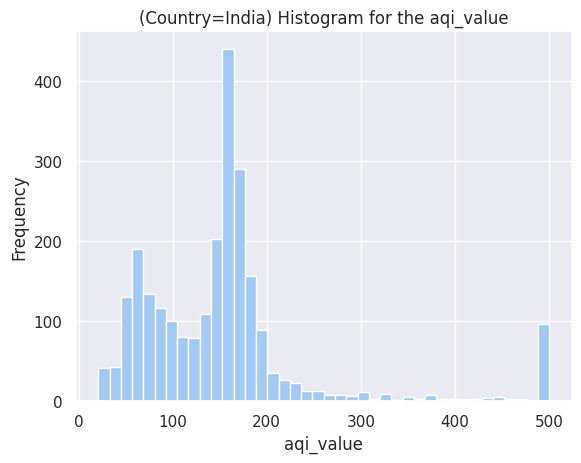

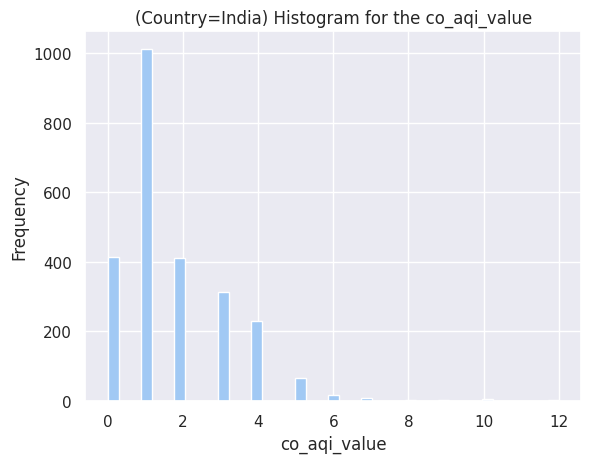

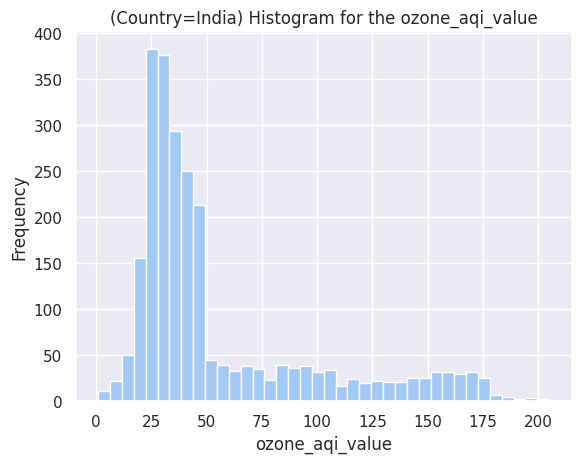

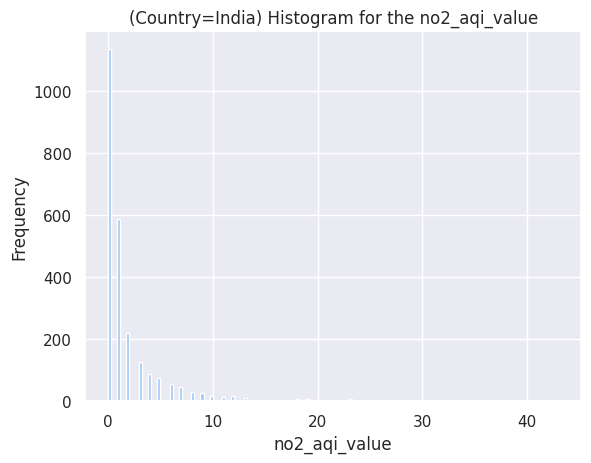

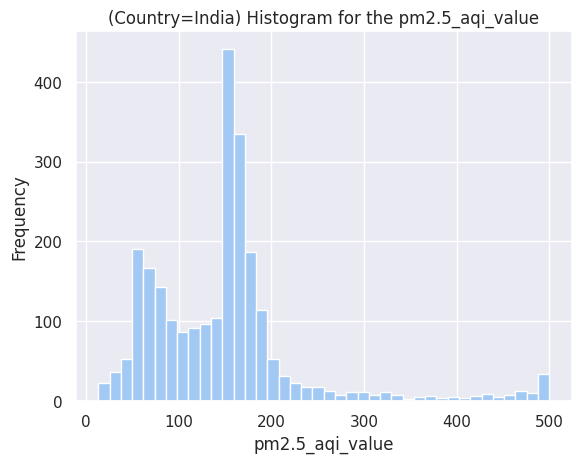

In [23]:
columns =['aqi_value','co_aqi_value','ozone_aqi_value','no2_aqi_value', 'pm2.5_aqi_value']
country = df[df['country_name']=='India']

for i in country[columns]:
    plt.hist(data_to_be_visualised[i], bins="auto")
    plt.title('(Country=India) Histogram for the ' + i,)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

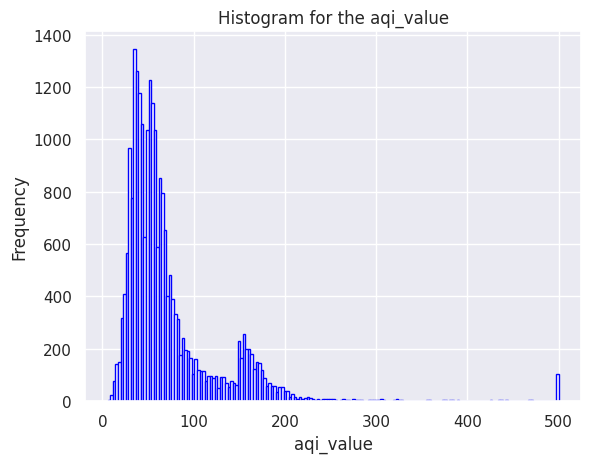

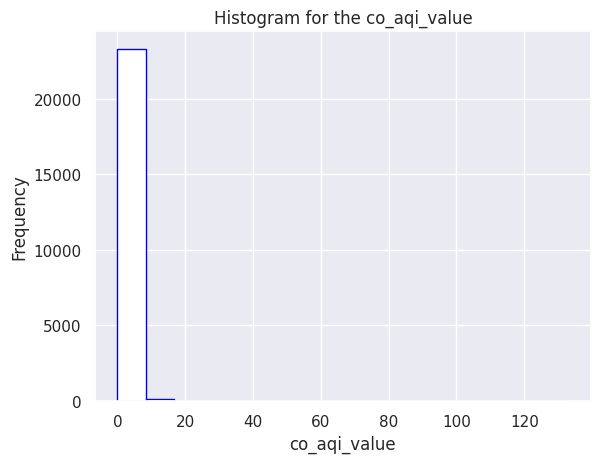

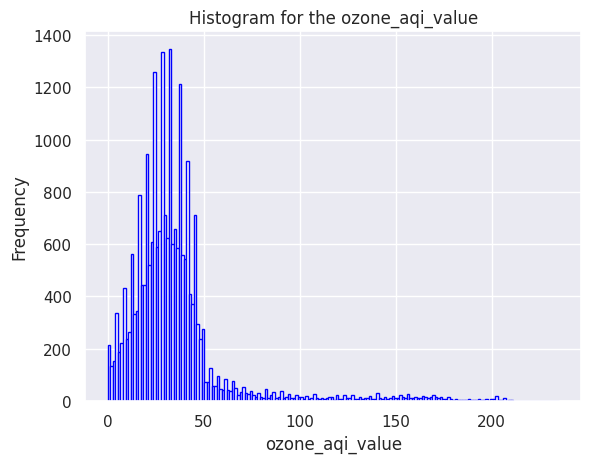

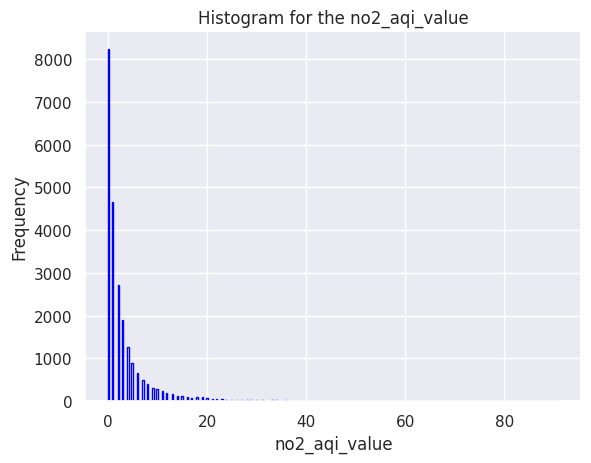

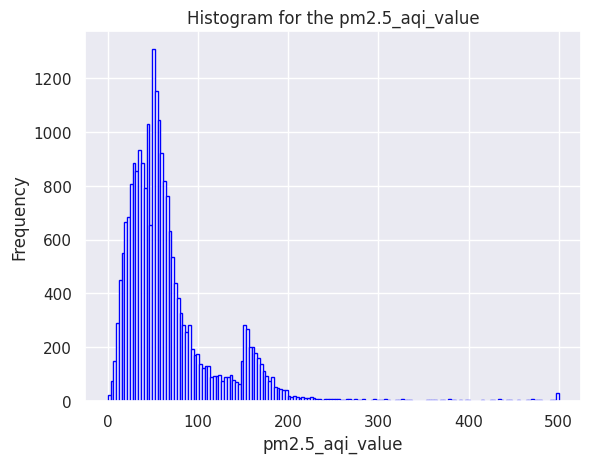

In [24]:
columns =['aqi_value','co_aqi_value','ozone_aqi_value','no2_aqi_value', 'pm2.5_aqi_value']


for i in df[columns]:
    plt.hist(world_data_visualization[i], bins="auto", color="white", edgecolor='blue')
    plt.title('Histogram for the ' + i)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.show()

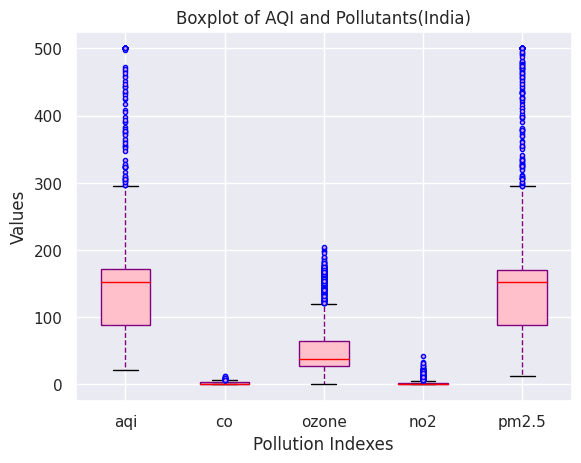

In [25]:

boxprops = dict(facecolor='pink', edgecolor='purple')
whiskerprops = dict(color='purple', linestyle='--')
medianprops = dict(color='red', linewidth=1)
flierprops = dict(marker='o', markersize=3, markerfacecolor='plum', markeredgecolor='blue')

plt.boxplot(data_to_be_visualised,
            patch_artist=True,
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            medianprops=medianprops,
            flierprops=flierprops, 
            labels=['aqi', 'co', 'ozone', 'no2', 'pm2.5'])


plt.title('Boxplot of AQI and Pollutants(India)')
plt.xlabel('Pollution Indexes')
plt.ylabel('Values')
plt.show()

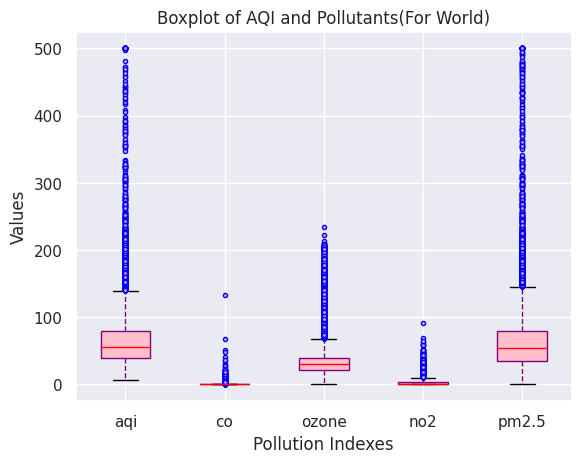

In [26]:

boxprops = dict(facecolor='pink', edgecolor='purple')
whiskerprops = dict(color='purple', linestyle='--')
medianprops = dict(color='red', linewidth=1)
flierprops = dict(marker='o', markersize=3, markerfacecolor='plum', markeredgecolor='blue')

plt.boxplot(world_data_visualization,
            patch_artist=True,
            boxprops=boxprops,
            whiskerprops=whiskerprops,
            medianprops=medianprops,
            flierprops=flierprops, 
            labels=['aqi', 'co', 'ozone', 'no2', 'pm2.5'])  # Labels for each boxplot


plt.title('Boxplot of AQI and Pollutants(For World)')
plt.xlabel('Pollution Indexes')
plt.ylabel('Values')
plt.show()

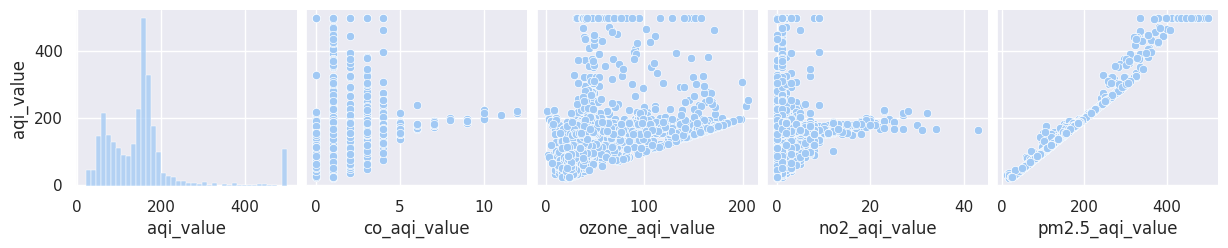

In [27]:
sns.pairplot(data=data_to_be_visualised, x_vars=data_to_be_visualised.columns, y_vars='aqi_value')

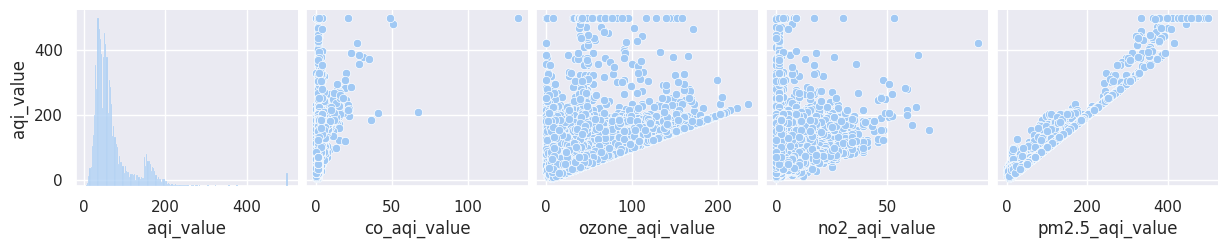

In [28]:
sns.pairplot(data=world_data_visualization, x_vars=world_data_visualization.columns, y_vars='aqi_value')

# Log Transformation

[Text(0.5, 0, 'Normal Distribution'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Air Quality Index(India)')]

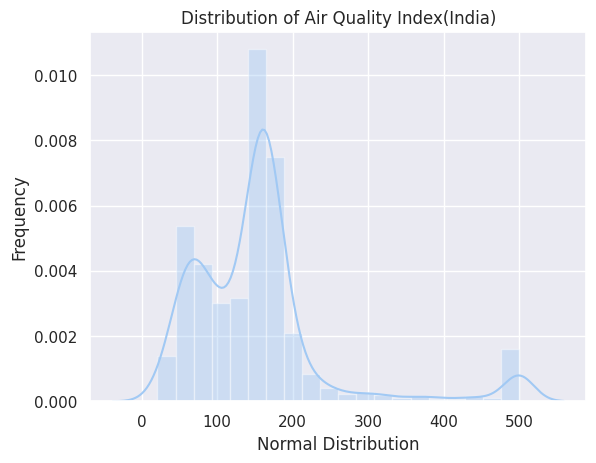

In [29]:
ax= sns.distplot(x=data_to_be_visualised['aqi_value'] , bins=20 , kde= True)
ax.set(xlabel= "Normal Distribution" , ylabel= "Frequency", title='Distribution of Air Quality Index(India)')

[Text(0.5, 0, 'Normal Distribution'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of Air Quality Index(World)')]

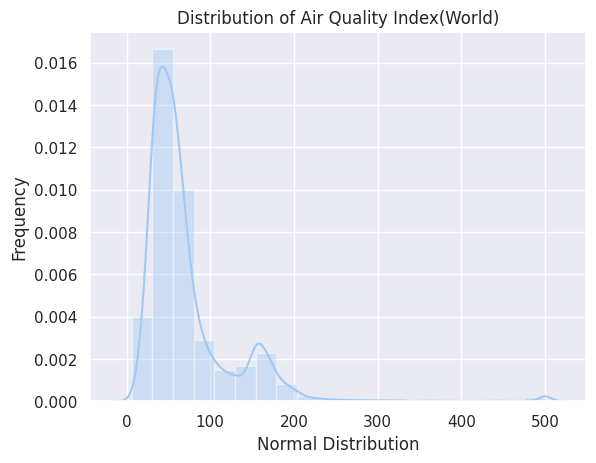

In [30]:
bx= sns.distplot(x=world_data_visualization['aqi_value'] , bins=20 , kde= True)
bx.set(xlabel= "Normal Distribution" , ylabel= "Frequency", title='Distribution of Air Quality Index(World)')

# Comparative Statistical Analysis


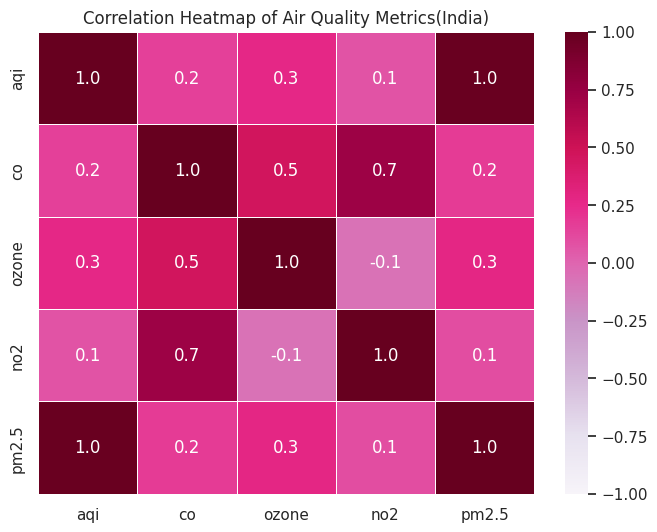

In [31]:


correlations = data_to_be_visualised.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True,cmap='PuRd', vmin=-1, vmax=1, linewidths=0.5, fmt=".1f")


column_names = ['aqi', 'co', 'ozone', 'no2', 'pm2.5']
plt.xticks(ticks=np.arange(len(column_names)) + 0.5, labels=column_names, rotation=0)
plt.yticks(ticks=np.arange(len(column_names)) + 0.5, labels=column_names, rotation=90)


plt.title('Correlation Heatmap of Air Quality Metrics(India)')
plt.show()

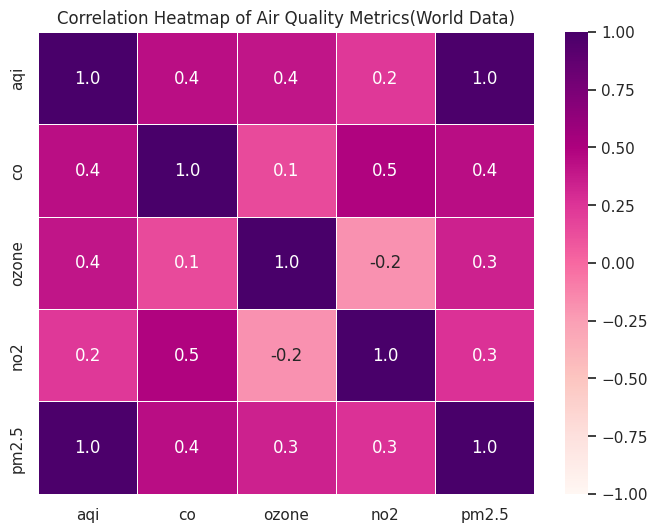

In [32]:

correlations = world_data_visualization.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True,cmap='RdPu', vmin=-1, vmax=1, linewidths=0.5, fmt=".1f")


column_names = ['aqi', 'co', 'ozone', 'no2', 'pm2.5']
plt.xticks(ticks=np.arange(len(column_names)) + 0.5, labels=column_names, rotation=0)
plt.yticks(ticks=np.arange(len(column_names)) + 0.5, labels=column_names, rotation=90)


plt.title('Correlation Heatmap of Air Quality Metrics(World Data)')
plt.show()

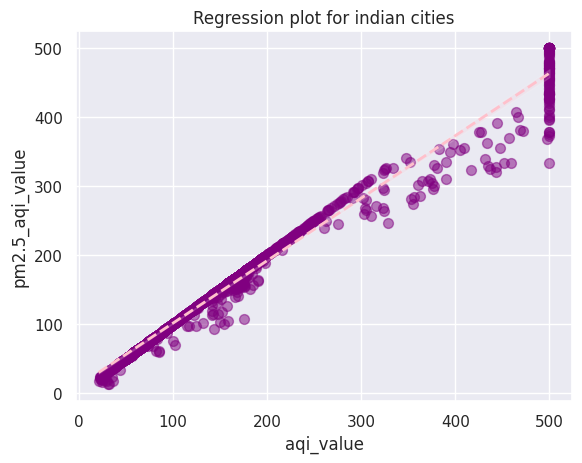

In [33]:

sns.regplot(x= data_to_be_visualised['aqi_value'], y= data_to_be_visualised['pm2.5_aqi_value'],
            scatter_kws={'color': 'purple', 's': 50, 'alpha': 0.5},
            line_kws={'color': 'pink', 'lw': 2, 'ls': '--'})
plt.title("Regression plot for indian cities")
plt.show()


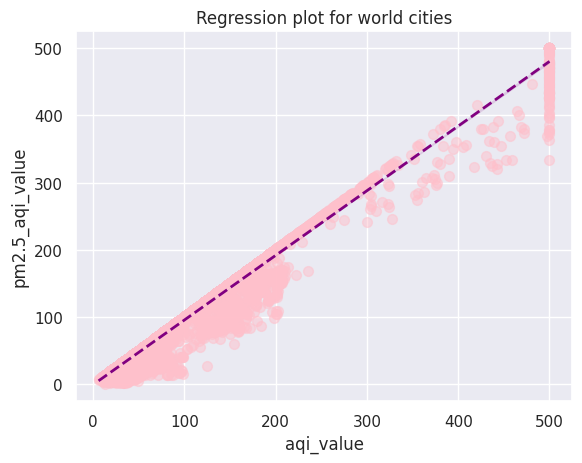

In [34]:

sns.regplot(x= world_data_visualization['aqi_value'], y= world_data_visualization['pm2.5_aqi_value'],
            scatter_kws={'color': 'pink', 's': 50, 'alpha': 0.5},
            line_kws={'color': 'purple', 'lw': 2, 'ls': '--'})
plt.title("Regression plot for world cities")

plt.show()

joint plot for indian cities


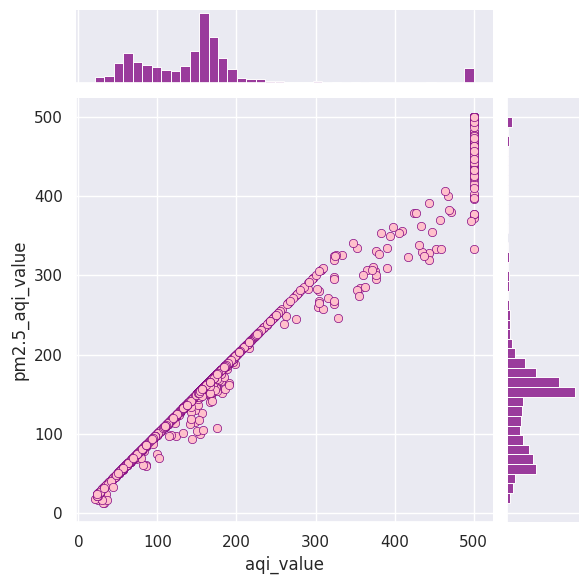

In [35]:
sns.jointplot(x= 'aqi_value', y= 'pm2.5_aqi_value', data= data_to_be_visualised,
              color='purple', joint_kws={'color':'pink'}, edgecolor='purple')
print("joint plot for indian cities")

plt.show()

Regression plot for world cities


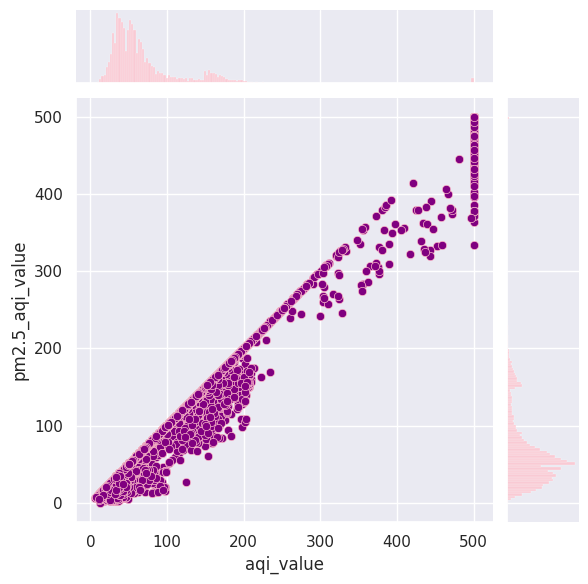

In [36]:
sns.jointplot(x= 'aqi_value', y= 'pm2.5_aqi_value', data= world_data_visualization,
              color='pink', joint_kws={'color':'purple'}, edgecolor='pink')
print("Regression plot for world cities")

plt.show()

# Data of Top 50 most polluted cities

In [37]:

top_50 = country.nlargest(50, columns)
Indian_Top_polluted_cities = top_50.style.background_gradient(cmap='RdPu')
print("Top 50 Most Polluted Indian Cities List With Other Air Quality Details:")
Indian_Top_polluted_cities

Top 50 Most Polluted Indian Cities List With Other Air Quality Details:


,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
22824,India,Bilari,500,Hazardous,4,Good,158,Unhealthy,4,Good,457,Hazardous
6786,India,Aonla,500,Hazardous,4,Good,149,Unhealthy for Sensitive Groups,4,Good,479,Hazardous
20570,India,Shamli,500,Hazardous,4,Good,77,Moderate,9,Good,426,Hazardous
10851,India,Dhanaura,500,Hazardous,3,Good,143,Unhealthy for Sensitive Groups,4,Good,428,Hazardous
1561,India,Dataganj,500,Hazardous,3,Good,61,Moderate,9,Good,437,Hazardous
720,India,Kandhla,500,Hazardous,3,Good,53,Moderate,8,Good,500,Hazardous
10926,India,Tikri,500,Hazardous,3,Good,47,Good,9,Good,500,Hazardous
18598,India,Palia Kalan,500,Hazardous,2,Good,152,Unhealthy,1,Good,456,Hazardous
19038,India,Khatauli,500,Hazardous,2,Good,140,Unhealthy for Sensitive Groups,3,Good,442,Hazardous
13604,India,Puranpur,500,Hazardous,2,Good,128,Unhealthy for Sensitive Groups,1,Good,481,Hazardous


In [38]:

other_Countries = df[(df['aqi_category']=='Hazardous') & (df['country_name']!='India')]

top_50 = other_Countries.nlargest(50, columns)
World_Top_polluted_cities = top_50.style.background_gradient(cmap='PuRd')
print("World's 50 Most Polluted Cities List With Other Air Quality Details:")

World_Top_polluted_cities

World's 50 Most Polluted Cities List With Other Air Quality Details:


,country_name,city_name,aqi_value,aqi_category,co_aqi_value,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
5156,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous
18160,South Africa,Boksburg,500,Hazardous,49,Good,1,Good,30,Good,500,Hazardous
22259,Russian Federation,Tynda,500,Hazardous,21,Good,8,Good,17,Good,475,Hazardous
941,Pakistan,Mailsi,500,Hazardous,1,Good,45,Good,0,Good,386,Hazardous
928,Pakistan,Lodhran,500,Hazardous,1,Good,45,Good,0,Good,364,Hazardous
620,Pakistan,Harunabad,500,Hazardous,1,Good,43,Good,0,Good,443,Hazardous
19551,Pakistan,Yazman,500,Hazardous,1,Good,43,Good,0,Good,428,Hazardous
276,Pakistan,Bahawalnagar,500,Hazardous,1,Good,38,Good,1,Good,466,Hazardous
13398,Democratic Republic of the Congo,Kasongo Lunda,481,Hazardous,51,Moderate,39,Good,7,Good,446,Hazardous
8080,Pakistan,Hasan Abdal,472,Hazardous,1,Good,46,Good,0,Good,374,Hazardous
